<a href="https://colab.research.google.com/github/sambit2407/NLP/blob/main/LSTM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import bz2

In [9]:
test_file = bz2.BZ2File('test.ft.txt.bz2')

In [10]:
test_file

In [11]:
test_file_lines = test_file.readlines()

In [12]:
len(test_file_lines)

400000

In [81]:
test_file_lines[0]

b'__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"\n'

In [14]:
test_file_lines[0]

b'__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"\n'

In [15]:

test_file = [x.decode('utf-8') for x in test_file_lines]

In [16]:
test_file[0]

'__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"\n'

In [87]:
test_file[0].split(' ', 1)[1]

'Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"\n'

In [17]:
# Extracting labels from sentences

test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file]
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in test_file]

In [88]:
len(test_labels)

400000

In [89]:
import pandas as pd
data = pd.DataFrame(list(zip(test_sentences, test_labels)),
               columns =['reviews', 'labels'])
data.head()

,reviews,labels
0,great cd: my lovely pat has one of the great v...,1
1,one of the best game music soundtracks - for a...,1
2,batteries died within a year ...: i bought thi...,0
3,"works fine, but maha energy is better: check o...",1
4,great for the non-audiophile: reviewed quite a...,1


In [90]:
data.shape

(400000, 2)

In [21]:
df=data.sample(frac = 0.075, ignore_index=True)

In [91]:
df

,reviews,labels
0,"toasts unevenly, failed after a few years: i'v...",0
1,boring: i had to read this book for school and...,0
2,not a good choice of song: while jessica simps...,0
3,awesome blu-ray: i could not be happier with t...,1
4,disappointing: i went out and bought this imme...,0
...,...,...
29995,funny: i recommend this movie for those over 4...,1
29996,"maiden fan: i love iron maiden, however the ed...",0
29997,2 star: had to give it 2 stars because i had t...,0
29998,"dear god, i love jamie stewart: there is almos...",1


In [23]:
df

,reviews,labels
0,"toasts unevenly, failed after a few years: i'v...",0
1,boring: i had to read this book for school and...,0
2,not a good choice of song: while jessica simps...,0
3,awesome blu-ray: i could not be happier with t...,1
4,disappointing: i went out and bought this imme...,0
...,...,...
29995,funny: i recommend this movie for those over 4...,1
29996,"maiden fan: i love iron maiden, however the ed...",0
29997,2 star: had to give it 2 stars because i had t...,0
29998,"dear god, i love jamie stewart: there is almos...",1


In [92]:
df.shape

(30000, 2)

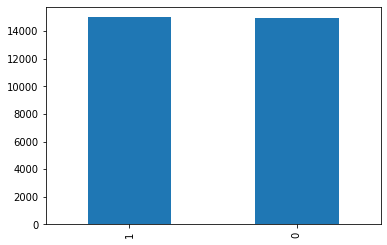

In [93]:
df['labels'].value_counts().plot(kind='bar')

In [94]:
#Getting Independent feature
X=df.drop(labels=['labels'],axis=1)
X

,reviews
0,"toasts unevenly, failed after a few years: i'v..."
1,boring: i had to read this book for school and...
2,not a good choice of song: while jessica simps...
3,awesome blu-ray: i could not be happier with t...
4,disappointing: i went out and bought this imme...
...,...
29995,funny: i recommend this movie for those over 4...
29996,"maiden fan: i love iron maiden, however the ed..."
29997,2 star: had to give it 2 stars because i had t...
29998,"dear god, i love jamie stewart: there is almos..."


In [95]:
X.shape

(30000, 1)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [96]:
y=df['labels']
y.shape

(30000,)

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.0'

**One Hot** **Representation** 

In [ ]:
X

,reviews
0,opened my eyes: this book presents the most ob...
1,"metallica's fall: this cd, simply put is horri..."
2,love it!!!!: my boyfriend love the watch!!!! i...
3,trite: the fridays gang steals some diamonds. ...
4,"simple and functional: great product, took for..."
...,...
29995,shipped too early: i found the graphics primit...
29996,a winner--righly textured and exciting music: ...
29997,charming: albom's wonderful little story carri...
29998,high quality clock: this clock is exceptional....


In [ ]:
# type(reviews)

In [ ]:
# reviews['reviews'][0].split()

In [ ]:
# len(reviews)

In [97]:
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords

In [98]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
ps=PorterStemmer()

In [29]:
from time import time
def clean(data):
  
  corpus=[]
  for i in range(0,len(data['reviews'])):
    print(i)
    review=re.sub('[^a-zA-Z]',' ',data['reviews'][i])
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
  return corpus









In [30]:
init=time()
corpus=clean(df)
print('Time Taken : ',time()-init)

Streaming output truncated to the last 5000 lines.
25001
25002
25003
25004
25005
25006
25007
25008
25009
25010
25011
25012
25013
25014
25015
25016
25017
25018
25019
25020
25021
25022
25023
25024
25025
25026
25027
25028
25029
25030
25031
25032
25033
25034
25035
25036
25037
25038
25039
25040
25041
25042
25043
25044
25045
25046
25047
25048
25049
25050
25051
25052
25053
25054
25055
25056
25057
25058
25059
25060
25061
25062
25063
25064
25065
25066
25067
25068
25069
25070
25071
25072
25073
25074
25075
25076
25077
25078
25079
25080
25081
25082
25083
25084
25085
25086
25087
25088
25089
25090
25091
25092
25093
25094
25095
25096
25097
25098
25099
25100
25101
25102
25103
25104
25105
25106
25107
25108
25109
25110
25111
25112
25113
25114
25115
25116
25117
25118
25119
25120
25121
25122
25123
25124
25125
25126
25127
25128
25129
25130
25131
25132
25133
25134
25135
25136
25137
25138
25139
25140
25141
25142
25143
25144
25145
25146
25147
25148
25149
25150
25151
25152
25153
25154
25155
25156
25157
25158
2

In [100]:
corpus

['toast unevenli fail year own toaster four year day one disappoint four slot rightmost one toast evenli three toast one side significantli side real problem toast bread like ciabatta narrow window toasti one side inciner bare brown left pair slot much weaker right pair therefor take longer job hassl prepar toast famili breakfast recent one element die complet anoth thing note unlik toaster one energi vampir toast number light whenev unit plug even use',
 'bore read book school hate thought realli bore action book would recomend book anyon know',
 'good choic song jessica simpson amaz singer song sung well suit suit robbi william better',
 'awesom blu ray could happier blu ray price reason disc contain lot materi',
 'disappoint went bought immedi finish secret life bee enjoy much unfortun forc finish stori drag foreshadow took away whatev mysteri might hate main charact jessi self reflect childish self discoveri trite stereotyp said kidd write beauti one need better stori better charac

In [101]:
len(corpus)

30000

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
from nltk.tokenize import word_tokenize

all_words = []
for sent in corpus:
  
  tokenize_word = word_tokenize(sent)
  for word in tokenize_word:
    all_words.append(word)
  

  

      

In [37]:
unique_words = set(all_words)
print(len(unique_words))

42498


In [ ]:

  
# Longest String in list
# using loop
num=[]
for ele in corpus:
  print(ele)
  print(len(ele.split()))
    
  num.append(len(ele.split()))

    
  
# printing result
print("Maximum length string is : " , max(num))

Streaming output truncated to the last 5000 lines.
nice tone look tone product fine long use gloss great durabl
11
good buy troubl start troubl load song comput recogn etc driver updat work fairli well month start lock playback way unlock remov batteri pretti soon lock turn say recommend one
30
final ufc dvd back yeah event least dvd back way post fight co review alreadi fight one dvd countdown show backstag bonu weigh show plu intro fight rogan interview post fight keep em come like fine pre post press confer would nice enjoy
43
dog love vet recommend small dog due dental problem enjoy lot
11
drink empti stomach love white tea ador harney son howev tea made feel littl funki mayb cardammon empti stomach felt littl sick tea like harney son sachet reali loos tea conveni tea bag tea bag brew two cup tea instruct brew individu tea tin
44
auto erotica book realli rel bore look pervers psycholog adapt find disgust disturb overli magnifi examin sado masoch bound modern machineri author rel sp

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
23
wrangler swim dive come forget wash wear instruct jean talk depart store khaki achiev best fitwith rigid pre wash wrangler put buy littleon snug side jump spa pool lake swim add dive boot fin truli waterman use scuba boat wet bike whatev think wet protect nasti cut scrape sting aquat environ dive water fine never mind jean heavi wet stuff nayser never good time water fact mold bodi draw good athlet fit look great everywher oh water swim like fish lifeguard avid diver hope safe water alway prepar jump get wet
91
comfort star qualiti end star use bluetooth headset long time jabra time last bt fail soon decid tri someth new tri h sinc behind ear style read review decid tri one comfort love mic way sensit gener much nois receiv parti make unus time return next day amazon
48
nora robert think nora robert book enjoy alway amaz captur interest everi time book give thrill romanc give insight world art art histori art scienc love thank nora


In [ ]:
len(corpus)

30000

In [38]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [7]:
# sent=['this is a boy','i love this india','he like the hotel','i dont like the product']
# one_hot('this is a boy',2)

[1, 1, 1, 1]

In [103]:
voc_size=42500

In [104]:
onehot_repr= [one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[41775,
  18626,
  41715,
  35183,
  4478,
  27967,
  4352,
  35183,
  31735,
  33425,
  20614,
  4352,
  29865,
  6003,
  33425,
  41775,
  5814,
  20375,
  41775,
  33425,
  28081,
  29556,
  28081,
  25913,
  38659,
  41775,
  27075,
  9529,
  24584,
  10109,
  9562,
  7969,
  33425,
  28081,
  14751,
  42388,
  35297,
  26487,
  30333,
  29865,
  28165,
  17334,
  8282,
  30333,
  6460,
  2762,
  29640,
  12283,
  40807,
  7864,
  41775,
  13473,
  14287,
  30169,
  33425,
  25555,
  30977,
  5227,
  13894,
  16219,
  26738,
  25487,
  27967,
  33425,
  41775,
  39941,
  41775,
  31171,
  12903,
  24043,
  4346,
  19663,
  6630,
  24762],
 [30560,
  33618,
  599,
  18671,
  13214,
  39176,
  30207,
  30560,
  1088,
  599,
  17972,
  19535,
  599,
  40270,
  22929],
 [29851,
  40892,
  19767,
  33323,
  10776,
  5352,
  17582,
  19767,
  303,
  16865,
  894,
  894,
  23908,
  12908,
  38550],
 [24216,
  15591,
  5302,
  38618,
  25253,
  15591,
  5302,
  25249,
  40001,
  36530,
  

In [105]:
len(onehot_repr)

30000

In [42]:
length_word=[]
for i in range(0,len(onehot_repr)):
  length=len(onehot_repr[i])
  length_word.append(length)

print(max(length_word))  

151


***Embedding Representation***

In [106]:
sent_length=160
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[    0     0     0 ... 19663  6630 24762]
 [    0     0     0 ...   599 40270 22929]
 [    0     0     0 ... 23908 12908 38550]
 ...
 [    0     0     0 ... 12986 18310 13814]
 [    0     0     0 ... 15339  1521 39228]
 [    0     0     0 ... 16303 39409 21248]]


In [107]:
embedded_docs[2]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [45]:
## Creating model
embedding_vector_features=50
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 160, 50)           2125000   
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 2,185,501
Trainable params: 2,185,501
Non-trainable params: 0
_________________________________________________________________
None


In [109]:
len(embedded_docs), y.shape

(30000, (30000,))

In [111]:
y

0        0
1        0
2        0
3        1
4        0
        ..
29995    1
29996    0
29997    0
29998    1
29999    0
Name: labels, Length: 30000, dtype: int64

In [112]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [113]:
X_final.shape,y_final.shape

((30000, 160), (30000,))

In [114]:
X_final

array([[    0,     0,     0, ..., 19663,  6630, 24762],
       [    0,     0,     0, ...,   599, 40270, 22929],
       [    0,     0,     0, ..., 23908, 12908, 38550],
       ...,
       [    0,     0,     0, ..., 12986, 18310, 13814],
       [    0,     0,     0, ..., 15339,  1521, 39228],
       [    0,     0,     0, ..., 16303, 39409, 21248]], dtype=int32)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [55]:
y_train.shape

(20100,)

In [56]:
## Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
315/315 [==============================] - 47s 143ms/step - loss: 0.4278 - accuracy: 0.8019 - val_loss: 0.3386 - val_accuracy: 0.8575
Epoch 2/10
315/315 [==============================] - 46s 146ms/step - loss: 0.2429 - accuracy: 0.9054 - val_loss: 0.3746 - val_accuracy: 0.8480
Epoch 3/10
315/315 [==============================] - 46s 147ms/step - loss: 0.1652 - accuracy: 0.9396 - val_loss: 0.4514 - val_accuracy: 0.8430
Epoch 4/10
315/315 [==============================] - 47s 150ms/step - loss: 0.1175 - accuracy: 0.9563 - val_loss: 0.4778 - val_accuracy: 0.8395
Epoch 5/10
315/315 [==============================] - 48s 151ms/step - loss: 0.0820 - accuracy: 0.9724 - val_loss: 0.6455 - val_accuracy: 0.8304
Epoch 6/10
315/315 [==============================] - 48s 152ms/step - loss: 0.0668 - accuracy: 0.9774 - val_loss: 0.6209 - val_accuracy: 0.8277
Epoch 7/10
315/315 [==============================] - 48s 153ms/step - loss: 0.0521 - accuracy: 0.9838 - val_loss: 0.7224 - val_ac

In [57]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=50
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 160, 50)           2125000   
                                                                 
 dropout (Dropout)           (None, 160, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,185,501
Trainable params: 2,185,501
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
## Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
315/315 [==============================] - 51s 156ms/step - loss: 0.5135 - accuracy: 0.7505 - val_loss: 0.3416 - val_accuracy: 0.8555
Epoch 2/10
315/315 [==============================] - 51s 163ms/step - loss: 0.2798 - accuracy: 0.8895 - val_loss: 0.3404 - val_accuracy: 0.8565
Epoch 3/10
315/315 [==============================] - 51s 161ms/step - loss: 0.1953 - accuracy: 0.9268 - val_loss: 0.4148 - val_accuracy: 0.8432
Epoch 4/10
315/315 [==============================] - 51s 163ms/step - loss: 0.1406 - accuracy: 0.9491 - val_loss: 0.4232 - val_accuracy: 0.8455
Epoch 5/10
315/315 [==============================] - 52s 166ms/step - loss: 0.1016 - accuracy: 0.9654 - val_loss: 0.4795 - val_accuracy: 0.8418
Epoch 6/10
315/315 [==============================] - 52s 165ms/step - loss: 0.0828 - accuracy: 0.9724 - val_loss: 0.5532 - val_accuracy: 0.8354
Epoch 7/10
315/315 [==============================] - 52s 164ms/step - loss: 0.0717 - accuracy: 0.9750 - val_loss: 0.7515 - val_ac

**Performance Metrics And Accuracy**


In [60]:
X_test.shape

(9900, 160)

In [115]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [116]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [63]:
len(y_test)

9900

In [64]:
len(y_pred)

9900

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

In [117]:
confusion_matrix(y_test,y_pred)

array([[4027,  886],
       [ 782, 4205]])

In [67]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.82      0.83      4913\n           1       0.83      0.84      0.83      4987\n\n    accuracy                           0.83      9900\n   macro avg       0.83      0.83      0.83      9900\nweighted avg       0.83      0.83      0.83      9900\n'

In [ ]:
  '''          precision    recall  f1-score   support

           0       0.84      0.82      0.83      4913
           1       0.83      0.84      0.83      4987

    accuracy                           0.83      9900
   macro avg       0.83      0.83      0.83      9900
weighted avg       0.83      0.83      0.83      9900
      '''


'       precision    recall  f1-score   support\n\n    0       0.81      0.86      0.83      4951\n    1       0.85      0.80      0.82      4949\n\n    accuracy                           0.83      9900\n   macro avg       0.83      0.83      0.83      9900\nweighted avg       0.83      0.83      0.83      9900'

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8315151515151515

***Prediction of Unknownreview***

In [118]:
sent_prerdiction=["This smartphone is very good in camera and battery And value for money from Samsung with clean and smooth Ui and good battery life also","This phone is having some serious issue with network , I hav tried with all sim card but still some issue with network , while doing calls its getting interrupted again n again.","This is worst to buy Samsung F12 because I have purchased the phone but it's display is not working properly. I have to press hard on screen then it work it doesn't work smoothly.","Don't buy Samsung at this price range. They have comprised on the quality big time"]



In [119]:

pred_data = pd.DataFrame((sent_prerdiction),columns =['reviews'])
               
pred_data.head()

,reviews
0,This smartphone is very good in camera and bat...
1,This phone is having some serious issue with n...
2,This is worst to buy Samsung F12 because I hav...
3,Don't buy Samsung at this price range. They ha...


In [120]:
corpus_pred=clean(pred_data)

0
1
2
3


In [121]:
corpus_pred

['thi smartphon good camera batteri and valu money samsung clean smooth Ui good batteri life also',
 'thi phone seriou issu network I hav tri sim card still issu network call get interrupt n',
 'thi worst buy samsung F I purchas phone display work properli I press hard screen work work smoothli',
 'don buy samsung price rang they compris qualiti big time']

In [129]:
onehot_repr= [one_hot(words,voc_size)for words in corpus_pred] 
onehot_repr

[[24573,
  16495,
  29851,
  41768,
  16555,
  22132,
  5261,
  35251,
  34359,
  38791,
  21075,
  38628,
  29851,
  16555,
  6889,
  41491],
 [24573,
  39254,
  10239,
  26266,
  18390,
  32288,
  22487,
  29190,
  40565,
  26215,
  39409,
  26266,
  18390,
  10449,
  37317,
  18804,
  9860],
 [24573,
  38581,
  18202,
  34359,
  27130,
  32288,
  35126,
  39254,
  15885,
  9292,
  24953,
  32288,
  32932,
  3782,
  28952,
  9292,
  9292,
  11245],
 [3175, 18202, 34359, 25249, 3197, 29225, 5150, 21119, 38049, 40845]]

In [124]:
len(onehot_repr)

4

In [125]:
sent_length=160
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
  24573 16495 29851 41768 16555 22132  5261 35251 34359 38791 21075 38628
  29851 16555  6889 41491]
 [    0    

In [126]:
embedded_docs.shape

(4, 160)

In [127]:
y_pred_data = (model.predict(embedded_docs) > 0.5).astype("int32")

In [128]:
y_pred_data

array([[1],
       [0],
       [0],
       [1]], dtype=int32)